# Data analysis

In [1]:
# Imports
import os
import pandas as pd
import numpy as np

In [2]:
## Exploring the data

In [3]:
# Read data
# Define the file path
file_path = 'data/dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
non_integer_columns = df.select_dtypes(exclude=['int64']).columns
print(non_integer_columns)
non_integer_dtypes = df.select_dtypes(exclude=['int64']).dtypes
print(non_integer_dtypes)
print(df[non_integer_columns].describe())


Index(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')
Curricular units 1st sem (grade)    float64
Curricular units 2nd sem (grade)    float64
Unemployment rate                   float64
Inflation rate                      float64
GDP                                 float64
Target                               object
dtype: object
       Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
count                       4424.000000                       4424.000000   
mean                          10.640822                         10.230206   
std                            4.843663                          5.210808   
min                            0.000000                          0.000000   
25%                           11.000000                         10.750000   
50%                           12.285714                         12.200000   
75%               

In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [6]:
set(df['Target'])

{'Dropout', 'Enrolled', 'Graduate'}

We see that there are three categories for the target variable. I'm not sure how we should handle enrolled, as it doesn't really help us with predicting dropout, so I will remove them for now. 

In [7]:
# Assuming df is your DataFrame
counts = df['Target'].value_counts()
print(counts)


Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


In [8]:
# Assuming df is your DataFrame
filtered_df = df[df['Target'] != 'Enrolled']

# If you want to modify the original DataFrame in-place:
df = df[df['Target'] != 'Enrolled']

# After filtering, check the shape or head of your DataFrame to confirm the operation:
print(filtered_df.shape)
print(filtered_df.head())


(3630, 35)
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1            

We are left with 3650 useable examples. Now I will map the categories to 1 and 0 so it can be used for training

In [9]:
# Create a mapping dictionary with Dropout as 1 and Graduate as 0
target_mapping = {
    'Dropout': 1,
    'Graduate': 0
}

# Apply the mapping to the 'Target' column
df['Target'] = df['Target'].map(target_mapping)


In [10]:
print('Class balance:', sum(df['Target'] == 1) / len(df['Target'])*100 , '% of the dataset are dropouts, excluding current students.')

Class balance: 39.146005509641874 % of the dataset are dropouts, excluding current students.


# Traning

### Without cross-validation

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
from prettytable import PrettyTable

In [12]:
# Splitting the data
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "CART": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000),
    # "KNN": KNeighborsClassifier()  # Commented out due to error
}

results = {}
trained_models = {}  

for name, model in models.items():
    print(f"Training {name}...")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    
    print(f"{name} trained in {minutes}:m,{seconds}s")
    
    in_sample_score = accuracy_score(y_train, model.predict(X_train))
    out_of_sample_score = accuracy_score(y_test, model.predict(X_test))
    
    results[name] = [in_sample_score, out_of_sample_score, elapsed_time]
    trained_models[name] = model  

# Displaying results using PrettyTable
table = PrettyTable()
table.field_names = ["Model", "In-sample Accuracy", "Out-of-sample Accuracy", "Training Time (s)"]

for name, metrics in results.items():
    table.add_row([name] + metrics)

print(table)


Training Logistic Regression...
Logistic Regression trained in 0:m,0s
Training SVM...
SVM trained in 0:m,0s
Training CART...
CART trained in 0:m,0s
Training Random Forest...
Random Forest trained in 0:m,0s
Training Neural Network...
Neural Network trained in 0:m,8s
+---------------------+--------------------+------------------------+---------------------+
|        Model        | In-sample Accuracy | Out-of-sample Accuracy |  Training Time (s)  |
+---------------------+--------------------+------------------------+---------------------+
| Logistic Regression |  0.91538764266037  |   0.9201101928374655   |  0.5077548027038574 |
|         SVM         | 0.8890200708382526 |   0.898989898989899    | 0.17138457298278809 |
|         CART        |        1.0         |   0.8631772268135904   | 0.03438735008239746 |
|    Random Forest    |        1.0         |   0.9054178145087236   |    0.49169921875    |
|    Neural Network   | 0.9649744195198741 |   0.8925619834710744   |   8.41624116897583  

Note that KNN was skipped since I got an error with running predict to compute the accuracy metric

We can see that all models did very well in a short amount of time juding by accuracy. Note that the dataset is somewhat unbalanced. Should check other metrics as well depending on model. I.e. FP, FN, precision, recall, f1-score, confusion matrices etc.

Below I save the results in a CSV file for later use.

In [13]:
save_results = results
# Check if the 'results' directory exists, if not, create it
if not os.path.exists('results'):
    os.makedirs('results')

# Convert the results dictionary to a pandas DataFrame and save it to a CSV file
results_df = pd.DataFrame.from_dict(save_results, orient='index', columns=["In-sample Accuracy", "Out-of-sample Accuracy", "Training Time (s)"])
results_df.to_csv('results/model_results.csv')


Feature importances for CART:
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00996
Feature: 2, Score: 0.00372
Feature: 3, Score: 0.02000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00149
Feature: 7, Score: 0.01403
Feature: 8, Score: 0.00637
Feature: 9, Score: 0.01868
Feature: 10, Score: 0.02841
Feature: 11, Score: 0.00294
Feature: 12, Score: 0.00227
Feature: 13, Score: 0.00292
Feature: 14, Score: 0.07235
Feature: 15, Score: 0.00639
Feature: 16, Score: 0.01012
Feature: 17, Score: 0.02234
Feature: 18, Score: 0.00314
Feature: 19, Score: 0.00636
Feature: 20, Score: 0.04097
Feature: 21, Score: 0.01689
Feature: 22, Score: 0.01006
Feature: 23, Score: 0.03457
Feature: 24, Score: 0.00340
Feature: 25, Score: 0.00377
Feature: 26, Score: 0.00717
Feature: 27, Score: 0.01351
Feature: 28, Score: 0.56129
Feature: 29, Score: 0.02788
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.01449
Feature: 32, Score: 0.01618
Feature: 33, Score: 0.01834


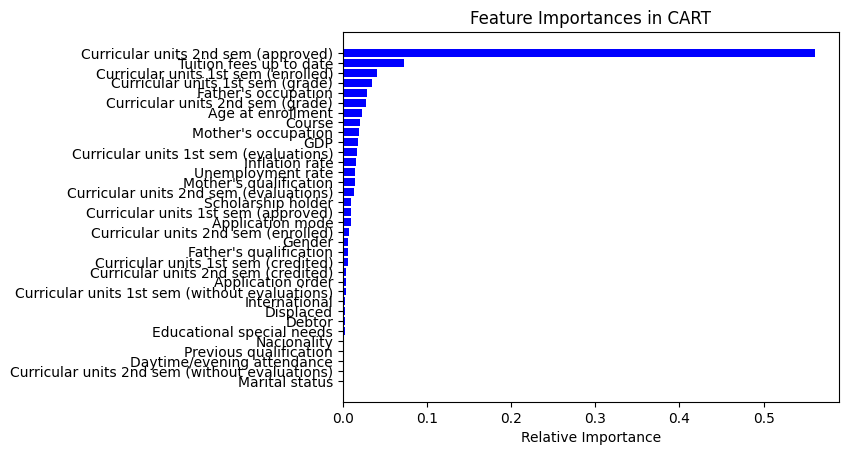

Feature importances for Random Forest:
Feature: 0, Score: 0.00264
Feature: 1, Score: 0.02318
Feature: 2, Score: 0.01142
Feature: 3, Score: 0.02854
Feature: 4, Score: 0.00255
Feature: 5, Score: 0.00506
Feature: 6, Score: 0.00248
Feature: 7, Score: 0.01510
Feature: 8, Score: 0.01677
Feature: 9, Score: 0.01817
Feature: 10, Score: 0.02075
Feature: 11, Score: 0.00586
Feature: 12, Score: 0.00078
Feature: 13, Score: 0.01597
Feature: 14, Score: 0.06570
Feature: 15, Score: 0.01320
Feature: 16, Score: 0.01972
Feature: 17, Score: 0.03066
Feature: 18, Score: 0.00129
Feature: 19, Score: 0.00652
Feature: 20, Score: 0.01768
Feature: 21, Score: 0.02537
Feature: 22, Score: 0.12243
Feature: 23, Score: 0.07312
Feature: 24, Score: 0.00409
Feature: 25, Score: 0.00609
Feature: 26, Score: 0.02296
Feature: 27, Score: 0.04207
Feature: 28, Score: 0.22403
Feature: 29, Score: 0.10618
Feature: 30, Score: 0.00273
Feature: 31, Score: 0.01581
Feature: 32, Score: 0.01529
Feature: 33, Score: 0.01580


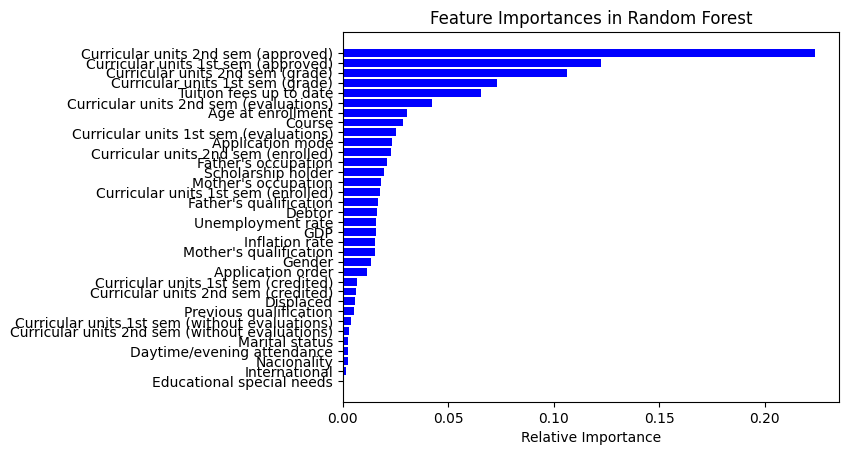

In [14]:
import matplotlib.pyplot as plt

# A dictionary to hold feature_importances for models that have them
feature_importances = {}

for name, model in trained_models.items():
    # Check if model has 'feature_importances_' attribute
    if hasattr(model, 'feature_importances_'):
        print(f"Feature importances for {name}:")
        importances = model.feature_importances_
        # Store the importances
        feature_importances[name] = importances
        # Summarize feature importance
        for i, v in enumerate(importances):
            print(f'Feature: {i}, Score: {v:.5f}')
        
        # Plot feature importance
        indices = np.argsort(importances)
        plt.figure()
        plt.title(f'Feature Importances in {name}')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()


Next step: also try gradient boosting methods like lightgbm and xtreme gradient booston.
Next step: Make more performance metrics as listed in earlier comment.
Next step: Make plots or otherwise quantify variable importance.

In [15]:
# Retrieve the linear classifier from the trained models
linear_classifier = trained_models['Logistic Regression']

# Retrieve the coefficients
coefficients = linear_classifier.coef_[0]  # Assuming it is a binary classifier

# Retrieve the intercept
intercept = linear_classifier.intercept_[0]

# Print the coefficients and intercept
print("Coefficients of the linear classifier:")
for i in range(len(coefficients)):
    print(f"{df.columns[i]}: {coefficients[i]}")
print(f"Intercept: {intercept}")


Coefficients of the linear classifier:
Marital status: -0.24390615161410534
Application mode: 0.030006993146666484
Application order: 0.021588160370314642
Course: 0.07453611032051832
Daytime/evening attendance: 0.5440202284917088
Previous qualification: -0.037236924085174636
Nacionality: 0.1352642339561431
Mother's qualification: 0.005725496356732576
Father's qualification: -0.006003253556893873
Mother's occupation: -0.04790075605289057
Father's occupation: -0.011271225952933332
Displaced: 0.12350281156007294
Educational special needs: -0.06733031865411293
Debtor: 0.7983576025350292
Tuition fees up to date: -2.4958230272791226
Gender: 0.3820835229363507
Scholarship holder: -0.8185227431164259
Age at enrollment: 0.028565595854800136
International: -1.6437748193761925
Curricular units 1st sem (credited): 0.22147721430517947
Curricular units 1st sem (enrolled): 0.13343836483726587
Curricular units 1st sem (evaluations): -0.019898675844505755
Curricular units 1st sem (approved): -0.5973533

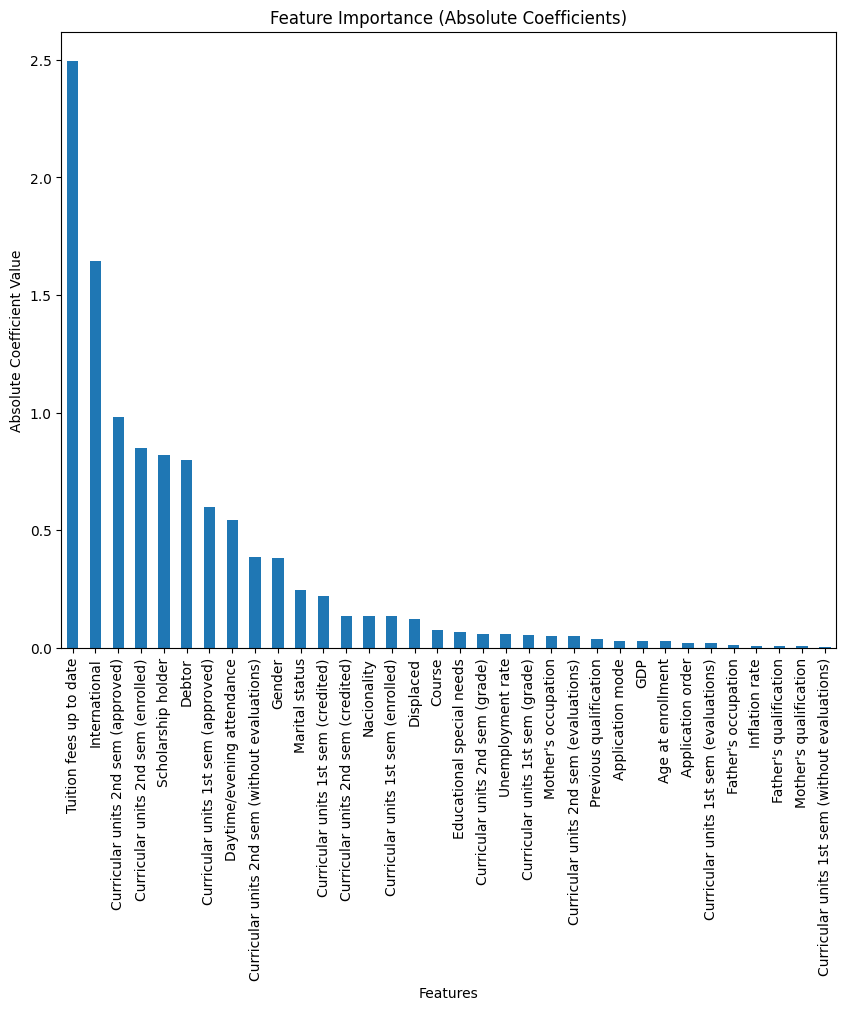

In [16]:
# Assuming 'linear_classifier' is your trained linear classifier and 'df' is your dataframe with feature names
coefficients = linear_classifier.coef_[0]  # get the coefficients
feature_names = df.drop('Target', axis=1).columns  # get the feature names, excluding the target

# Calculate the absolute values of the coefficients
coefficients_abs = np.abs(coefficients)

# Create a Series for easier plotting, indexed by feature names
coef_series = pd.Series(coefficients_abs, index=feature_names)

# Sort the values by their absolute value in descending order
sorted_coefs = coef_series.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))
sorted_coefs.plot(kind='bar')
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.show()


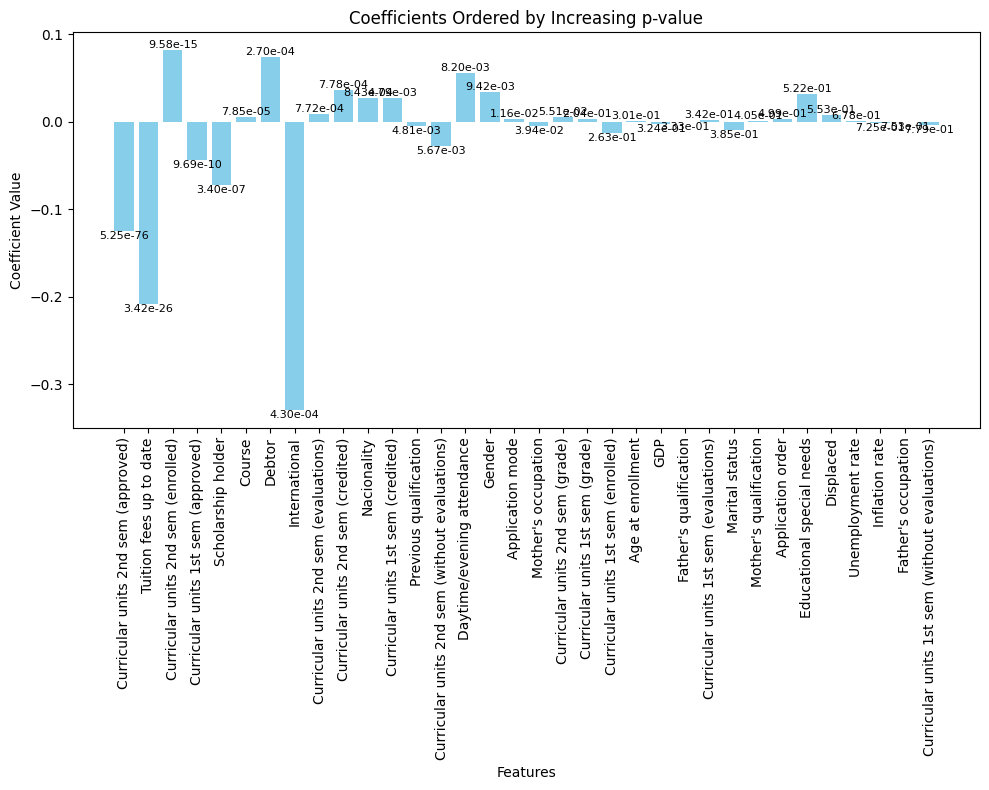

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'X_train' and 'y_train' are your training data and target variable, respectively

# Add a constant to the input features to include the intercept in the model
X_train_with_const = sm.add_constant(X_train)

# Fit an OLS model
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary of the model to extract coefficients and p-values
summary = model.summary()
p_values = model.pvalues
coefficients = model.params

# Drop the constant term if you wish to exclude it from the plot
p_values = p_values.drop('const', errors='ignore')
coefficients = coefficients.drop('const', errors='ignore')

# Create a DataFrame from the coefficients and p-values
coef_p_val_df = pd.DataFrame({'coef': coefficients, 'p_value': p_values})

# Sort the DataFrame by p-values in ascending order
sorted_df = coef_p_val_df.sort_values(by='p_value')

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(sorted_df.index, sorted_df['coef'], color='skyblue')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients Ordered by Increasing p-value')
# Optionally, add the p-values as text labels on the bars
for i, (pval, yval) in enumerate(zip(sorted_df['p_value'], sorted_df['coef'])):
    plt.text(i, yval, f"{pval:.2e}", ha='center', va='bottom' if yval > 0 else 'top', fontsize=8)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


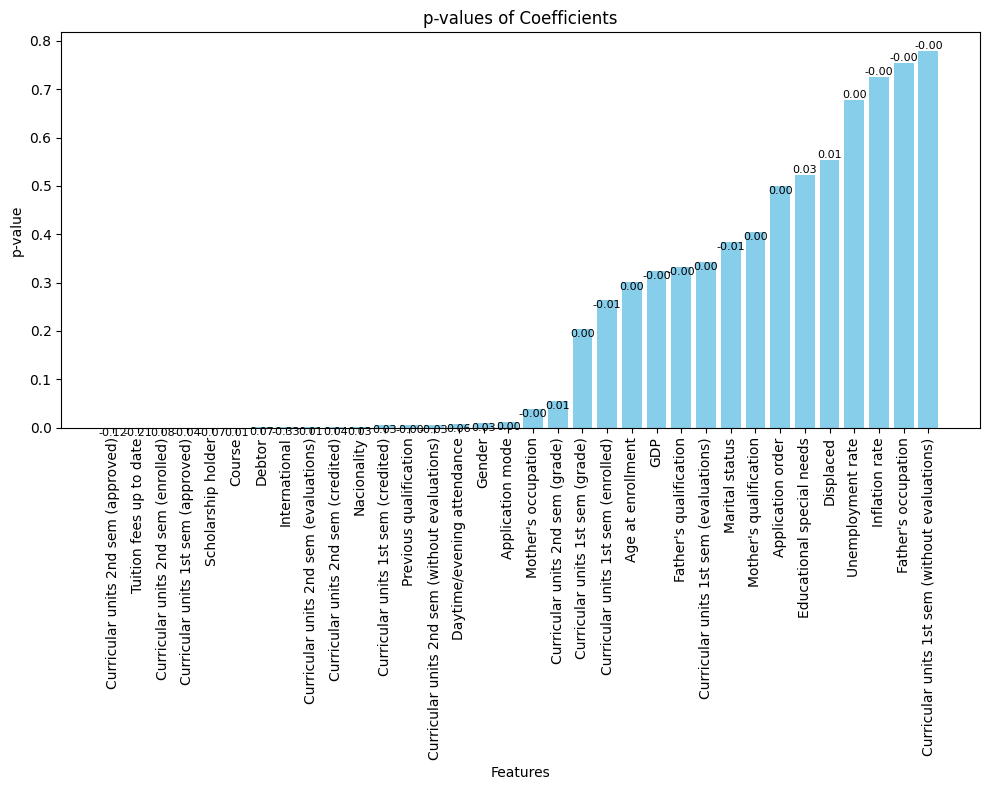

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'X_train' and 'y_train' are your training data and target variable, respectively

# Add a constant to the input features to include the intercept in the model
X_train_with_const = sm.add_constant(X_train)

# Fit an OLS model
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the coefficients and p-values
p_values = model.pvalues
coefficients = model.params

# Drop the constant term if you wish to exclude it from the plot
p_values = p_values.drop('const', errors='ignore')
coefficients = coefficients.drop('const', errors='ignore')

# Create a DataFrame from the coefficients and p-values
coef_p_val_df = pd.DataFrame({'coef': coefficients, 'p_value': p_values})

# Sort the DataFrame by p-values in ascending order
sorted_df = coef_p_val_df.sort_values(by='p_value')

# Plotting
plt.figure(figsize=(10, 8))
# The y-values are now the sorted p-values
plt.bar(sorted_df.index, sorted_df['p_value'], color='skyblue')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('p-value')
plt.title('p-values of Coefficients')
# Optionally, add the coefficient values as text labels on the bars
for i, (coef, pval) in enumerate(zip(sorted_df['coef'], sorted_df['p_value'])):
    plt.text(i, pval, f"{coef:.2f}", ha='center', va='bottom' if pval > 0.5 else 'top', fontsize=8)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


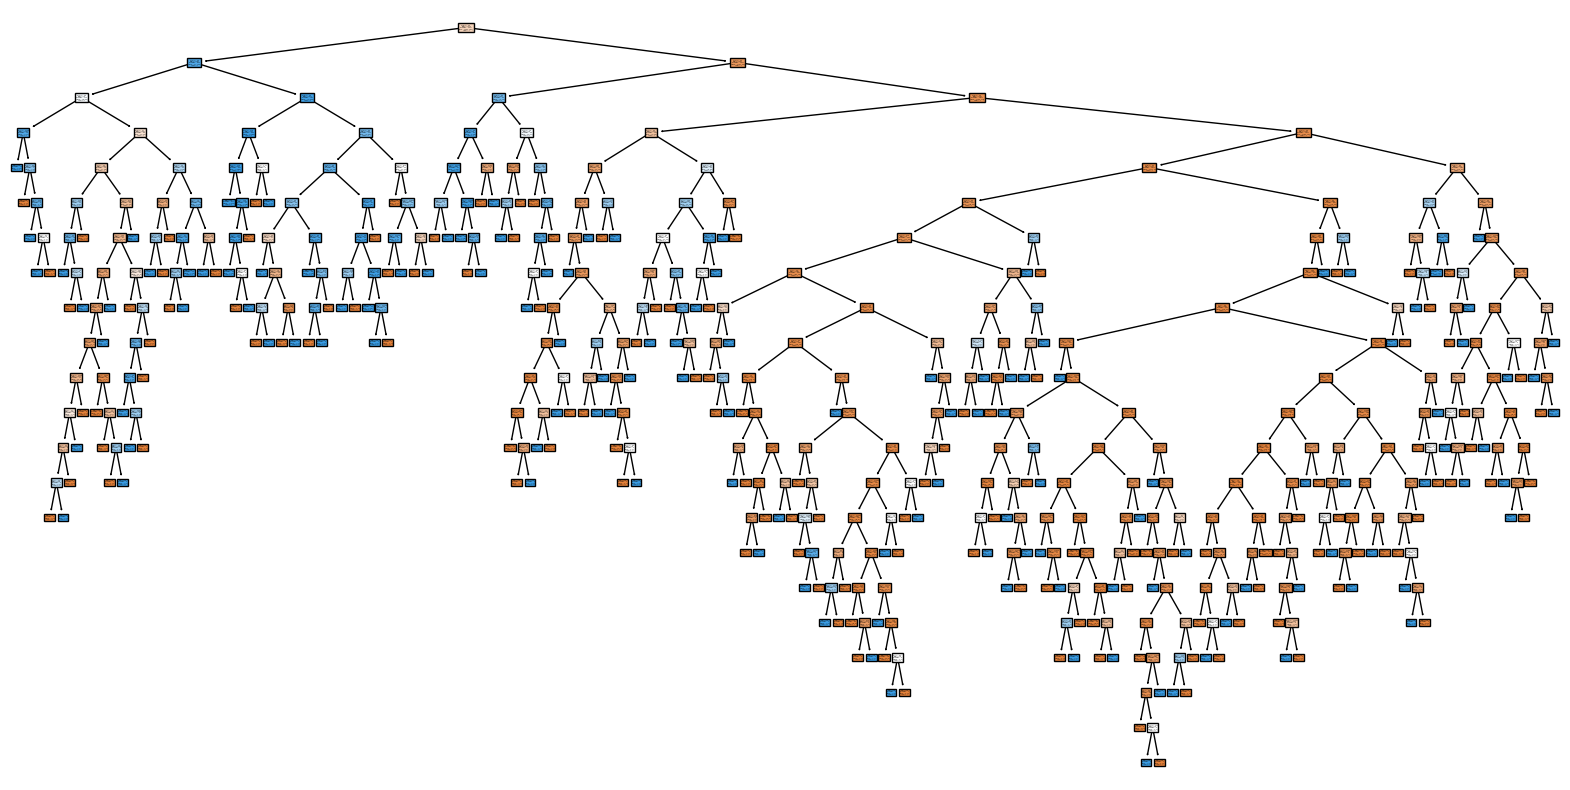

In [21]:
cart = trained_models['CART']
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(cart, filled=True,  class_names="Target")
plt.show()



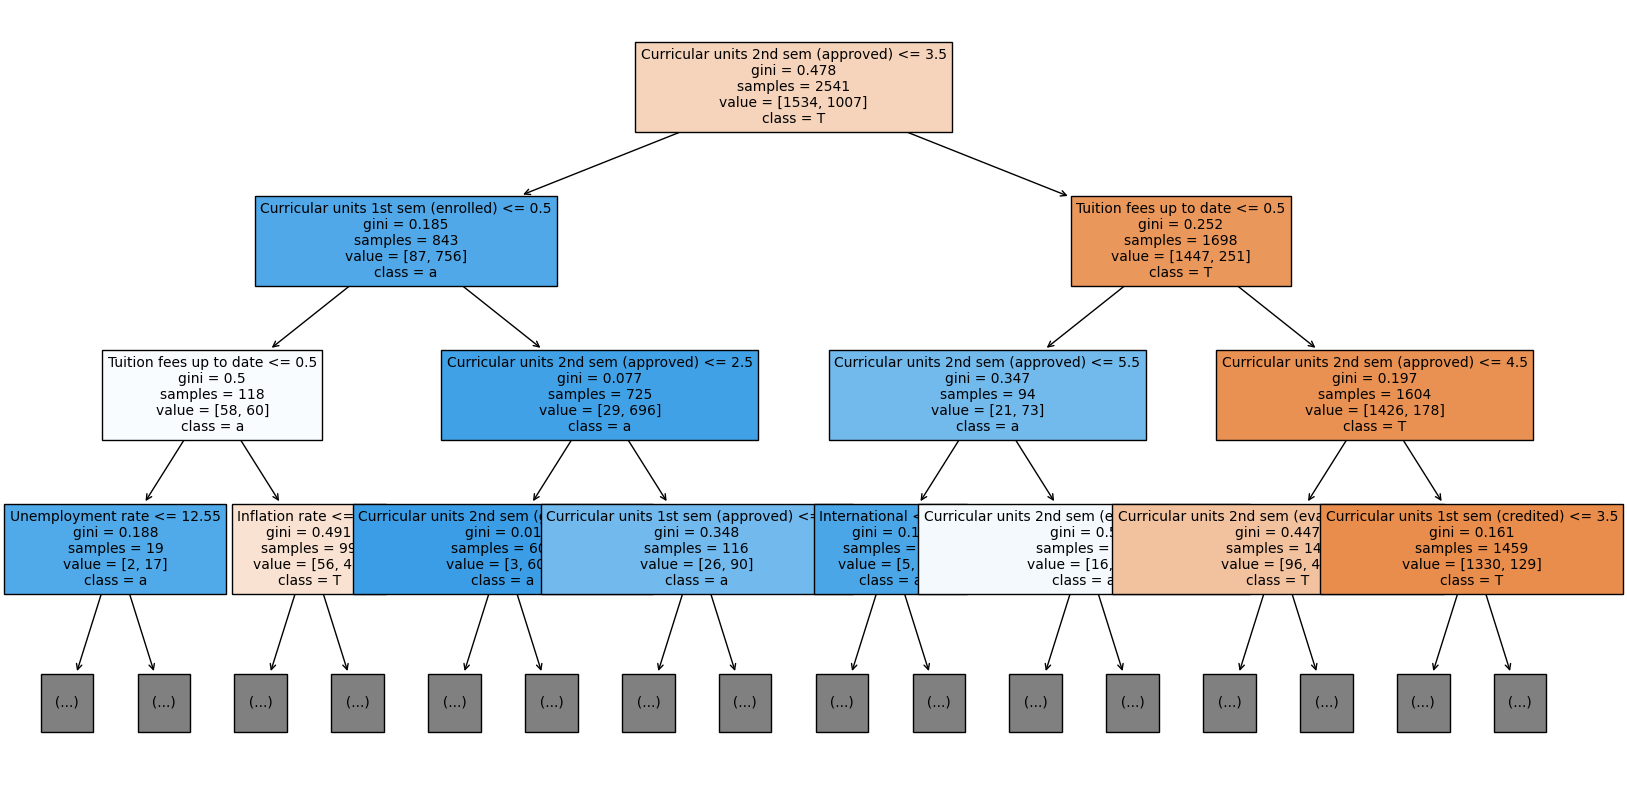

In [23]:
plt.figure(figsize=(20,10))
plot_tree(cart, filled=True,  class_names="Target", max_depth=3, fontsize=10, feature_names=X.columns)
plt.show()